In [1]:
import numpy as npy
import pandas as pds
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.gridspec import GridSpec
%matplotlib inline


In [2]:
# %pip install --upgrade pip
# %pip install openpyxl

In [3]:
column_headers=['ObjectId', 'Country', 'ISO2', 'ISO3', 'Indicator', 'Unit', 'Source',
'CTS_Code', 'CTS_Name', 'CTS_Full_Descriptor', 'Industry', 'Scale',
'1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
'2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
'2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018']
       
df = pds.read_csv('../dataset/global_CO2_emissions/global_CO2_emissions.csv')
# Global CO2
df_co2 = pds.read_csv('../dataset/global_CO2_emissions/Global Fossil Carbon Dioxide emissions by Year-https___www.worldometers.info_co2-emissions_co2-emissions-by-year.csv', index_col='Year') #CO2 emission
# World GDP
df_gdp = pds.read_csv('../dataset/global_CO2_emissions/World GDP 1960-2023-https___www.macrotrends.net_countries_WLD_world_gdp-gross-domestic-product.csv', index_col='Year') #GDP
# pds.options.display.max_columns = None
# pds.options.display.max_rows = None
df.columns = column_headers

# df2

### Data Exploration

In [4]:
df

,ObjectId,Country,ISO2,ISO3,Indicator,Unit,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,1,Argentina,AR,ARG,CO2 emissions,Millions of Metric tons of CO2,"OECD (2021), OECD Inter-Country Input-Output D...",ECNC,CO2 Emissions,"Environment, Climate Change, Economic Activity...",...,0.284000,0.319000,0.338000,0.377000,0.378000,0.369000,0.371000,0.303000,0.358000,0.344000
1,2,Argentina,AR,ARG,CO2 emissions,Millions of Metric tons of CO2,"OECD (2021), OECD Inter-Country Input-Output D...",ECNC,CO2 Emissions,"Environment, Climate Change, Economic Activity...",...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,3,Argentina,AR,ARG,CO2 emissions,Millions of Metric tons of CO2,"OECD (2021), OECD Inter-Country Input-Output D...",ECNC,CO2 Emissions,"Environment, Climate Change, Economic Activity...",...,0.725000,0.738000,0.765000,0.777000,0.840000,0.794000,0.852000,0.789000,0.846000,0.857000
3,4,Argentina,AR,ARG,CO2 emissions,Millions of Metric tons of CO2,"OECD (2021), OECD Inter-Country Input-Output D...",ECNC,CO2 Emissions,"Environment, Climate Change, Economic Activity...",...,13.804000,14.110000,14.616000,14.120000,15.358000,13.728000,14.273000,13.838000,14.121000,13.067000
4,5,Argentina,AR,ARG,CO2 emissions,Millions of Metric tons of CO2,"OECD (2021), OECD Inter-Country Input-Output D...",ECNC,CO2 Emissions,"Environment, Climate Change, Economic Activity...",...,2.648000,2.989000,3.094000,3.129000,3.327000,3.323000,3.345000,3.435000,3.564000,3.584000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8905,8906,Vietnam,VN,VNM,CO2 emissions multipliers,Metric Tons of CO2 Emissions per $1million USD...,"OECD (2021), OECD Inter-Country Input-Output D...",ECNM,CO2 Emissions Multipliers,"Environment, Climate Change, Economic Activity...",...,571.409871,460.836156,347.350194,299.661077,282.529754,297.871935,365.437022,333.755635,303.371701,326.056753
8906,8907,Vietnam,VN,VNM,CO2 emissions multipliers,Metric Tons of CO2 Emissions per $1million USD...,"OECD (2021), OECD Inter-Country Input-Output D...",ECNM,CO2 Emissions Multipliers,"Environment, Climate Change, Economic Activity...",...,906.449860,889.629032,725.459644,659.111915,573.819271,585.155874,693.572818,702.200536,613.915080,694.331871
8907,8908,Vietnam,VN,VNM,CO2 emissions multipliers,Metric Tons of CO2 Emissions per $1million USD...,"OECD (2021), OECD Inter-Country Input-Output D...",ECNM,CO2 Emissions Multipliers,"Environment, Climate Change, Economic Activity...",...,3807.684853,3020.134010,2253.246177,1917.872096,1908.984147,2093.765490,2982.160528,3974.738515,3664.875652,3295.556416
8908,8909,Vietnam,VN,VNM,CO2 emissions multipliers,Metric Tons of CO2 Emissions per $1million USD...,"OECD (2021), OECD Inter-Country Input-Output D...",ECNM,CO2 Emissions Multipliers,"Environment, Climate Change, Economic Activity...",...,449.066931,440.446520,378.152049,357.297470,350.369327,377.126416,479.038527,506.595843,451.921218,508.214053


In [5]:
df.describe()

,ObjectId,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
count,8910.000000,8910.000000,8910.000000,8910.000000,8910.000000,8910.000000,8910.000000,8910.000000,8910.000000,8910.000000,...,8910.000000,8910.000000,8910.000000,8910.000000,8910.000000,8910.000000,8910.000000,8910.000000,8910.000000,8910.000000
mean,4455.500000,642.690767,626.247949,597.889064,634.523417,628.532695,584.815129,581.440616,545.903132,490.212486,...,277.552219,255.599049,228.419131,226.670976,219.907381,217.131214,254.947335,300.596451,256.180262,224.472003
std,2572.239783,4630.754009,4370.387146,3440.589143,3472.768617,3072.488297,2403.487481,2405.330851,2168.233614,2003.781611,...,1073.148968,967.957555,885.294193,913.127550,911.191397,800.634281,1154.516988,3413.770262,1516.822242,793.934788
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2228.250000,0.551750,0.579000,0.574250,0.583250,0.606250,0.672000,0.677000,0.702750,0.747000,...,0.831250,0.864750,0.870250,0.895000,0.906250,0.889250,0.905000,0.897750,0.962250,0.975000
50%,4455.500000,51.483010,51.680268,52.319637,54.133453,54.645225,57.685882,59.304477,56.832295,50.775041,...,31.513547,29.964705,26.775893,27.436395,26.485056,25.452176,27.371744,27.459369,26.590652,25.698487
75%,6682.750000,342.525963,339.773235,349.418155,358.978451,357.182242,362.076765,363.397858,340.890874,302.102272,...,181.621510,170.145047,149.792878,150.786022,146.083990,148.533203,167.667274,167.091640,158.101021,150.373212
max,8910.000000,268619.614800,244816.005900,180811.599800,172174.706800,131047.244200,82288.011300,84204.541120,70922.998900,63207.730870,...,29960.060010,28251.186870,29678.748310,29089.169930,32033.948990,17089.568230,53393.751770,220076.705300,85065.783690,20139.395610


In [6]:
df_co2

,Fossil CO2 Emissions (tons),CO2 emisions change,CO2 emissions per capita,Population,Pop. Change
Year,,,,,
1971,"15,679,743,000",-0.50%,4.15,"3,775,759,617",2.04%
1972,"16,464,900,000",5.01%,4.27,"3,851,650,245",2.01%
1973,"17,441,791,000",5.93%,4.44,"3,927,780,238",1.98%
1974,"17,396,363,000",-0.26%,4.34,"4,003,794,172",1.94%
1975,"17,346,512,000",-0.29%,4.25,"4,079,480,606",1.89%
1976,"18,329,016,000",5.66%,4.41,"4,154,666,864",1.84%
1977,"18,874,320,000",2.98%,4.46,"4,229,506,060",1.80%
1978,"19,477,371,000",3.20%,4.52,"4,304,533,501",1.77%
1979,"20,031,918,000",2.85%,4.57,"4,380,506,100",1.76%


In [7]:
df_gdp

,GDP (Billion US Dollars),Per Capita (in US Dollars),Percentage Growth
Year,,,
1960,"1,392.28",459,NaN
1961,"1,448.63",471,0.0379
1962,"1,550.55",496,0.0532
1963,"1,671.61",523,0.0519
1964,"1,830.29",561,0.0656
...,...,...,...
2017,"81,400.67","10,741",0.0339
2018,"86,456.89","11,284",0.0329
2019,"87,645.26","11,320",0.0259


In [8]:
print('Main dataset: ',df.shape)
print('Global CO2 dataset: ', df_co2.shape)
print('World GDP dataset: ', df_gdp.shape)

Main dataset:  (8910, 36)
Global CO2 dataset:  (46, 5)
World GDP dataset:  (62, 3)


In [9]:
df.Country.unique()

array(['Argentina', 'Australia', 'Austria', 'Belgium', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Cambodia', 'Canada', 'Chile',
       'China, P.R.: Hong Kong', 'China, P.R.: Mainland', 'Colombia',
       'Costa Rica', 'Croatia, Rep. of', 'Cyprus', 'Czech Rep.',
       'Denmark', 'Estonia, Rep. of', 'Finland', 'France', 'Germany',
       'Greece', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Ireland',
       'Israel', 'Italy', 'Japan', 'Kazakhstan, Rep. of',
       'Korea, Rep. of', "Lao People's Dem. Rep.", 'Latvia', 'Lithuania',
       'Luxembourg', 'Malaysia', 'Malta', 'Mexico', 'Morocco', 'Myanmar',
       'Netherlands, The', 'New Zealand', 'Norway', 'Peru', 'Philippines',
       'Poland, Rep. of', 'Portugal', 'Romania', 'Russian Federation',
       'Saudi Arabia', 'Singapore', 'Slovak Rep.', 'Slovenia, Rep. of',
       'South Africa', 'Spain', 'Sweden', 'Switzerland',
       'Taiwan Province of China', 'Thailand', 'Tunisia', 'Turkey',
       'United Kingdom', 'United State

In [10]:
print('The length of column Industry: ', len(df.Industry.unique()))
df.Industry.unique()

The length of column Industry:  45


array(['Accomodation and food services',
       'Activities of households as employers; undifferentiated goods- and services-producing activities of households for own use',
       'Administrative and support services',
       'Agriculture, hunting, forestry', 'Air transport',
       'Arts, entertainment and recreation', 'Basic metals',
       'Chemicals and pharmaceutical products',
       'Coke and refined petroleum products',
       'Computer, electronic and optical products', 'Construction',
       'Education', 'Electrical equipment',
       'Electricity, gas, steam and air conditioning supply',
       'Fabricated metal products', 'Financial and insurance activities',
       'Fishing and aquaculture', 'Food products, beverages and tobacco',
       'Human health and social work activities',
       'IT and other information services',
       'Land transport and transport via pipelines',
       'Machinery and equipment n.e.c.',
       'Manufacturing nec; repair and installation of mac

In [11]:
df.isnull().sum()

ObjectId               0
Country                0
ISO2                   0
ISO3                   0
Indicator              0
Unit                   0
Source                 0
CTS_Code               0
CTS_Name               0
CTS_Full_Descriptor    0
Industry               0
Scale                  0
1995                   0
1996                   0
1997                   0
1998                   0
1999                   0
2000                   0
2001                   0
2002                   0
2003                   0
2004                   0
2005                   0
2006                   0
2007                   0
2008                   0
2009                   0
2010                   0
2011                   0
2012                   0
2013                   0
2014                   0
2015                   0
2016                   0
2017                   0
2018                   0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8910 entries, 0 to 8909
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ObjectId             8910 non-null   int64  
 1   Country              8910 non-null   object 
 2   ISO2                 8910 non-null   object 
 3   ISO3                 8910 non-null   object 
 4   Indicator            8910 non-null   object 
 5   Unit                 8910 non-null   object 
 6   Source               8910 non-null   object 
 7   CTS_Code             8910 non-null   object 
 8   CTS_Name             8910 non-null   object 
 9   CTS_Full_Descriptor  8910 non-null   object 
 10  Industry             8910 non-null   object 
 11  Scale                8910 non-null   object 
 12  1995                 8910 non-null   float64
 13  1996                 8910 non-null   float64
 14  1997                 8910 non-null   float64
 15  1998                 8910 non-null   f

There are no missing values on df but on df_co2 and df_gdp


### Data Cleaning


In [13]:
# Creating a checkpoint - 
df_main = df.copy()
df_main.head()

,ObjectId,Country,ISO2,ISO3,Indicator,Unit,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,1,Argentina,AR,ARG,CO2 emissions,Millions of Metric tons of CO2,"OECD (2021), OECD Inter-Country Input-Output D...",ECNC,CO2 Emissions,"Environment, Climate Change, Economic Activity...",...,0.284,0.319,0.338,0.377,0.378,0.369,0.371,0.303,0.358,0.344
1,2,Argentina,AR,ARG,CO2 emissions,Millions of Metric tons of CO2,"OECD (2021), OECD Inter-Country Input-Output D...",ECNC,CO2 Emissions,"Environment, Climate Change, Economic Activity...",...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,3,Argentina,AR,ARG,CO2 emissions,Millions of Metric tons of CO2,"OECD (2021), OECD Inter-Country Input-Output D...",ECNC,CO2 Emissions,"Environment, Climate Change, Economic Activity...",...,0.725,0.738,0.765,0.777,0.840,0.794,0.852,0.789,0.846,0.857
3,4,Argentina,AR,ARG,CO2 emissions,Millions of Metric tons of CO2,"OECD (2021), OECD Inter-Country Input-Output D...",ECNC,CO2 Emissions,"Environment, Climate Change, Economic Activity...",...,13.804,14.110,14.616,14.120,15.358,13.728,14.273,13.838,14.121,13.067
4,5,Argentina,AR,ARG,CO2 emissions,Millions of Metric tons of CO2,"OECD (2021), OECD Inter-Country Input-Output D...",ECNC,CO2 Emissions,"Environment, Climate Change, Economic Activity...",...,2.648,2.989,3.094,3.129,3.327,3.323,3.345,3.435,3.564,3.584


In [14]:
# Rename the incorrectly named countries
df_mod_country = df_main.replace({
       'Country': {
              'China, P.R.: Hong Kong' : 'Hong Kong',
              'China, P.R.: Mainland' : 'China',
              'Croatia, Rep. of' : 'Croatia',
              'Czech Rep.' : 'Czech',
              'Estonia, Rep. of' : 'Estonia',
              'Kazakhstan, Rep. of' : 'Kazakhstan',
              'Korea, Rep. of' : 'Korea',
              "Lao People's Dem. Rep." : 'Lao',
              'Netherlands, The' : 'Netherlands',
              'Poland, Rep. of' : 'Poland',
              'Russian Federation' : 'Russian',
              'Slovak Rep.' : 'Slovak',
              'Slovenia, Rep. of' : 'Slovenia',
              'Taiwan Province of China' : 'Taiwan'
       }
})

df_mod_country.Country.unique()

array(['Argentina', 'Australia', 'Austria', 'Belgium', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Cambodia', 'Canada', 'Chile',
       'Hong Kong', 'China', 'Colombia', 'Costa Rica', 'Croatia',
       'Cyprus', 'Czech', 'Denmark', 'Estonia', 'Finland', 'France',
       'Germany', 'Greece', 'Hungary', 'Iceland', 'India', 'Indonesia',
       'Ireland', 'Israel', 'Italy', 'Japan', 'Kazakhstan', 'Korea',
       'Lao', 'Latvia', 'Lithuania', 'Luxembourg', 'Malaysia', 'Malta',
       'Mexico', 'Morocco', 'Myanmar', 'Netherlands', 'New Zealand',
       'Norway', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Romania',
       'Russian', 'Saudi Arabia', 'Singapore', 'Slovak', 'Slovenia',
       'South Africa', 'Spain', 'Sweden', 'Switzerland', 'Taiwan',
       'Thailand', 'Tunisia', 'Turkey', 'United Kingdom', 'United States',
       'Vietnam'], dtype=object)

In [15]:
df_mod_country.columns

Index(['ObjectId', 'Country', 'ISO2', 'ISO3', 'Indicator', 'Unit', 'Source',
       'CTS_Code', 'CTS_Name', 'CTS_Full_Descriptor', 'Industry', 'Scale',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018'],
      dtype='object')

In [16]:
df_mod_country.Industry.unique()

array(['Accomodation and food services',
       'Activities of households as employers; undifferentiated goods- and services-producing activities of households for own use',
       'Administrative and support services',
       'Agriculture, hunting, forestry', 'Air transport',
       'Arts, entertainment and recreation', 'Basic metals',
       'Chemicals and pharmaceutical products',
       'Coke and refined petroleum products',
       'Computer, electronic and optical products', 'Construction',
       'Education', 'Electrical equipment',
       'Electricity, gas, steam and air conditioning supply',
       'Fabricated metal products', 'Financial and insurance activities',
       'Fishing and aquaculture', 'Food products, beverages and tobacco',
       'Human health and social work activities',
       'IT and other information services',
       'Land transport and transport via pipelines',
       'Machinery and equipment n.e.c.',
       'Manufacturing nec; repair and installation of mac

In [17]:
# Drop 'ObjectId', 'ISO2', 'ISO3', 'Source', 'CTS_Code', 'CTS_Name', 'CTS_Full_Descriptor', 'Scale'
df_drop_iso = df_mod_country.drop(['ObjectId', 'ISO2', 'ISO3', 'Source', 'CTS_Code', 'CTS_Name', 'CTS_Full_Descriptor', 'Scale'], axis=1)
df_drop_iso

,Country,Indicator,Unit,Industry,1995,1996,1997,1998,1999,2000,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Argentina,CO2 emissions,Millions of Metric tons of CO2,Accomodation and food services,0.159000,0.158000,0.163000,0.170000,0.175000,0.183000,...,0.284000,0.319000,0.338000,0.377000,0.378000,0.369000,0.371000,0.303000,0.358000,0.344000
1,Argentina,CO2 emissions,Millions of Metric tons of CO2,Activities of households as employers; undiffe...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Argentina,CO2 emissions,Millions of Metric tons of CO2,Administrative and support services,0.326000,0.351000,0.363000,0.360000,0.336000,0.338000,...,0.725000,0.738000,0.765000,0.777000,0.840000,0.794000,0.852000,0.789000,0.846000,0.857000
3,Argentina,CO2 emissions,Millions of Metric tons of CO2,"Agriculture, hunting, forestry",8.914000,9.580000,9.625000,9.180000,9.124000,9.020000,...,13.804000,14.110000,14.616000,14.120000,15.358000,13.728000,14.273000,13.838000,14.121000,13.067000
4,Argentina,CO2 emissions,Millions of Metric tons of CO2,Air transport,1.957000,2.518000,2.523000,2.664000,2.602000,2.499000,...,2.648000,2.989000,3.094000,3.129000,3.327000,3.323000,3.345000,3.435000,3.564000,3.584000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8905,Vietnam,CO2 emissions multipliers,Metric Tons of CO2 Emissions per $1million USD...,Warehousing and support activities for transpo...,519.764644,466.062272,382.618770,415.963400,414.567551,446.926284,...,571.409871,460.836156,347.350194,299.661077,282.529754,297.871935,365.437022,333.755635,303.371701,326.056753
8906,Vietnam,CO2 emissions multipliers,Metric Tons of CO2 Emissions per $1million USD...,"Water supply; sewerage, waste management and r...",674.488008,646.824053,678.445578,752.219607,711.425741,708.719932,...,906.449860,889.629032,725.459644,659.111915,573.819271,585.155874,693.572818,702.200536,613.915080,694.331871
8907,Vietnam,CO2 emissions multipliers,Metric Tons of CO2 Emissions per $1million USD...,Water transport,4962.411721,4524.064409,4186.056061,5198.122248,5090.530714,4466.546521,...,3807.684853,3020.134010,2253.246177,1917.872096,1908.984147,2093.765490,2982.160528,3974.738515,3664.875652,3295.556416
8908,Vietnam,CO2 emissions multipliers,Metric Tons of CO2 Emissions per $1million USD...,Wholesale and retail trade; repair of motor ve...,640.400379,598.307544,582.122660,626.587673,600.809924,591.404834,...,449.066931,440.446520,378.152049,357.297470,350.369327,377.126416,479.038527,506.595843,451.921218,508.214053


In [18]:
#  Analyzing the Categorical values in the non-numerical value fields

print("Country Field -> \n", df_drop_iso.Country.value_counts(), "\n")


Country Field -> 
 Argentina     135
Romania       135
Lithuania     135
Luxembourg    135
Malaysia      135
             ... 
Ireland       135
Israel        135
Italy         135
Japan         135
Vietnam       135
Name: Country, Length: 66, dtype: int64 



In [19]:
print("Indicator Field -> \n", df_drop_iso.Indicator.value_counts(), "\n")
print("Unit Field -> \n", df_drop_iso.Unit.value_counts(), "\n")
print("Industry Field -> \n", df_drop_iso.Industry.value_counts(), "\n")

Indicator Field -> 
 CO2 emissions                2970
CO2 emissions intensities    2970
CO2 emissions multipliers    2970
Name: Indicator, dtype: int64 

Unit Field -> 
 Metric Tons of CO2 Emissions per $1million USD of output    5940
Millions of Metric tons of CO2                              2970
Name: Unit, dtype: int64 

Industry Field -> 
 Accomodation and food services                                                                                                198
Mining and quarrying, energy producing products                                                                               198
Mining support service activities                                                                                             198
Motor vehicles, trailers and semi-trailers                                                                                    198
Other non-metallic mineral products                                                                                           198
Ot

In [20]:

categories = {
        'Agriculture, Fishing and Forestry':['Fishing', 'Agriculture', 'hunting', 'forestry'],
        'Transport':['Air transport', 'Land transport', 'Water transport', 'vehicles', 'motor', 'road'],
        'Health, Finance and Education':['Human health', 'Financial', 'Education'],
        'Energy sources':['electricity', 'gas', 'steam'],
        'Waste':['waste'],
        'Defence and Security':['defence', 'security'],
        'Consumable Product':['Food products', 'beverages', 'tobacco', 'medicinal chemical', 'botanical'],
        'Direct Industrial product':['metal', 'Chemicals', 'Coke', 'mineral', 'Paper', 'Rubber', 'cements', 'petroleum', 'plastic'],
        'Technology and Communication Activities':['computer', 'electronic', 'IT', 'courier', 'scientific', 'Publishing,', 'audiovisual and broadcasting', 'broadcasting', 'Telecommunications'],
        'Other industry and services':['Construction', 'Other service', 'textiles', 'wood', 'footwear', 'leather'],
        'Engineering, Machinery and Equipment':['machinery', 'equipment', 'warehouse'],
        'Mining Product and Activities':['Mining', 'quarrying'],
        'Housing and Entertainment Services':['Accommodation and food service', 'Administrative and support services', 'Real estate activities', 'Arts', 'entertainment', 'recreation', 'own use', 'Activities of households', 'entertainment']
        }

def count_categories(Industry):


    counts = {category: 0 for category in categories}

    for value in df.Industry:
        for category, keywords in categories.items():
            if any(keyword in str(value) for keyword in keywords):
                counts[category] += 1
                break

    for category, count in counts.items():
        # print(f'{category} is {count}')
        return counts 

# counts = {category: 0 for category in categories}

# for value in df_drop_iso.Industry:
#     for category, keywords in categories.items():
#         if any(keyword in str(value) for keyword in keywords):
#             counts[category] += 1
#             break

# for category, count in counts.items():
#     print(f'{category} is {count}')
    
# df_drop_iso['new_industry'] = df_drop_iso['Industry'].apply(count_categories)

In [21]:
def get_category(industry):
    if  ('Fishing' in str(industry)) or ('Agriculture' in str(industry)) or ('hunting' in str(industry)) or ('forestry' in str(industry)): 
        return 'Agriculture, Fishing and Forestry'
    elif('Air transport' in str(industry)) or ('Land transport' in str(industry)) or ('Water transport' in str(industry)) or ('vehicles' in str(industry)) or ('motor' in str(industry)) or ('road' in str(industry)): 
        return 'Transport'
    elif('Human health' in str(industry)) or ('Financial' in str(industry)) or ('Education' in str(industry)): 
        return 'Health, Finance and Education'
    elif('electricity' in str(industry)) or ('gas' in str(industry)) or ('steam' in str(industry)): 
        return 'Energy sources'
    elif('waste' in str(industry)): 
        return 'Waste'
    elif('defence' in str(industry)) or ('security' in str(industry)): 
        return 'Defence and Security'
    elif('Food products' in str(industry)) or ('beverages' in str(industry)) or ('tobacco' in str(industry)) or ('medicinal chemical' in str(industry)) or ('botanical' in str(industry)): 
        return 'Consumable Product'
    elif('metal' in str(industry)) or ('Chemicals' in str(industry)) or ('Coke' in str(industry)) or ('mineral' in str(industry)) or ('Paper' in str(industry)) or ('Rubber' in str(industry)) or ('cements' in str(industry)) or ('petroleum' in str(industry)) or ('plastic' in str(industry)): 
        return 'Direct Industrial product'
    elif('computer' in str(industry)) or ('electronic' in str(industry)) or ('IT' in str(industry)) or ('courier' in str(industry)) or ('scientific' in str(industry)) or ('Publishing,' in str(industry)) or ('audiovisual and broadcasting' in str(industry)) or ('broadcasting' in str(industry)) or ('Telecommunications' in str(industry)): 
        return 'Technology and Communication Activities'
    elif('Construction' in str(industry)) or ('Other service' in str(industry)) or ('textiles' in str(industry)) or ('wood' in str(industry)) or ('footwear' in str(industry)) or ('leather' in str(industry)): 
        return 'Other industry and services'
    elif('machinery' in str(industry)) or ('equipment' in str(industry)) or ('warehouse' in str(industry)) or ('Warehousing' in str(industry)): 
        return 'Engineering, Machinery and Equipment'
    elif('Mining' in str(industry)) or ('quarrying' in str(industry)): 
        return 'Mining Product and Activities'
    elif('Accomodation and food service' in str(industry)) or ('Administrative and support services' in str(industry)) or ('Real estate activities' in str(industry)) or ('Arts' in str(industry)) or ('entertainment' in str(industry)) or ('recreation' in str(industry)) or ('own use' in str(industry)) or ('Activities of households' in str(industry)) or ('entertainment' in str(industry)): 
        return 'Housing and Entertainment Services'
    

new_industry = df_drop_iso['Industry'].apply(get_category)
df_drop_iso = pds.concat([new_industry, df_drop_iso.drop(['Industry'], axis=1)], axis=1)
df_drop_iso

,Industry,Country,Indicator,Unit,1995,1996,1997,1998,1999,2000,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Housing and Entertainment Services,Argentina,CO2 emissions,Millions of Metric tons of CO2,0.159000,0.158000,0.163000,0.170000,0.175000,0.183000,...,0.284000,0.319000,0.338000,0.377000,0.378000,0.369000,0.371000,0.303000,0.358000,0.344000
1,Housing and Entertainment Services,Argentina,CO2 emissions,Millions of Metric tons of CO2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Housing and Entertainment Services,Argentina,CO2 emissions,Millions of Metric tons of CO2,0.326000,0.351000,0.363000,0.360000,0.336000,0.338000,...,0.725000,0.738000,0.765000,0.777000,0.840000,0.794000,0.852000,0.789000,0.846000,0.857000
3,"Agriculture, Fishing and Forestry",Argentina,CO2 emissions,Millions of Metric tons of CO2,8.914000,9.580000,9.625000,9.180000,9.124000,9.020000,...,13.804000,14.110000,14.616000,14.120000,15.358000,13.728000,14.273000,13.838000,14.121000,13.067000
4,Transport,Argentina,CO2 emissions,Millions of Metric tons of CO2,1.957000,2.518000,2.523000,2.664000,2.602000,2.499000,...,2.648000,2.989000,3.094000,3.129000,3.327000,3.323000,3.345000,3.435000,3.564000,3.584000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8905,"Engineering, Machinery and Equipment",Vietnam,CO2 emissions multipliers,Metric Tons of CO2 Emissions per $1million USD...,519.764644,466.062272,382.618770,415.963400,414.567551,446.926284,...,571.409871,460.836156,347.350194,299.661077,282.529754,297.871935,365.437022,333.755635,303.371701,326.056753
8906,Waste,Vietnam,CO2 emissions multipliers,Metric Tons of CO2 Emissions per $1million USD...,674.488008,646.824053,678.445578,752.219607,711.425741,708.719932,...,906.449860,889.629032,725.459644,659.111915,573.819271,585.155874,693.572818,702.200536,613.915080,694.331871
8907,Transport,Vietnam,CO2 emissions multipliers,Metric Tons of CO2 Emissions per $1million USD...,4962.411721,4524.064409,4186.056061,5198.122248,5090.530714,4466.546521,...,3807.684853,3020.134010,2253.246177,1917.872096,1908.984147,2093.765490,2982.160528,3974.738515,3664.875652,3295.556416
8908,Transport,Vietnam,CO2 emissions multipliers,Metric Tons of CO2 Emissions per $1million USD...,640.400379,598.307544,582.122660,626.587673,600.809924,591.404834,...,449.066931,440.446520,378.152049,357.297470,350.369327,377.126416,479.038527,506.595843,451.921218,508.214053


### Data Preprocessing:

#### Date processing for df_co2 and df_gdp

In [22]:
df_co2_date = df_co2.copy()
df_gdp_date = df_gdp.copy()

In [23]:
# Convert the index to string
df_co2_date.index = df_co2_date.index.astype(str)
df_gdp_date.index = df_gdp_date.index.astype(str)
df_gdp_date.index

Index(['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'],
      dtype='object', name='Year')

In [24]:
# Remove commas from the columns and convert the column GDP and Emission to float
df_gdp_date['GDP (Billion US Dollars)'] = df_gdp_date['GDP (Billion US Dollars)'].str.replace(',', '').astype(float)
df_co2_date['Fossil CO2 Emissions (tons)'] = df_co2_date['Fossil CO2 Emissions (tons)'].str.replace(',', '').astype(float)
df_gdp_date.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62 entries, 1960 to 2021
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   GDP (Billion US Dollars)    62 non-null     float64
 1   Per Capita (in US Dollars)  62 non-null     object 
 2   Percentage Growth           61 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.9+ KB


#### GroupBy Country, and Industry

In [25]:
df_ctry_grouped = df_drop_iso.copy()
df_itry_grouped = df_drop_iso.copy()

In [26]:
# Group the dataframe by the 'Country' columns separately
df_ctry_grouped = df_ctry_grouped.groupby('Country').mean() #.apply(list)

df_ctry_grouped

/tmp/ipykernel_5125/1560369489.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ctry_grouped = df_ctry_grouped.groupby('Country').mean() #.apply(list)


,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Country,,,,,,,,,,,,,,,,,,,,,
Argentina,199.113145,210.710816,208.617855,212.023909,220.759486,206.627666,211.711808,478.350317,419.929414,403.561228,...,251.040374,223.501481,201.515711,194.543280,192.453974,208.970789,198.419772,205.726688,170.645462,184.428879
Australia,446.433185,427.876937,415.410754,475.533920,488.622471,484.281380,530.958697,528.861985,450.412324,372.893350,...,253.903552,221.025659,175.408749,160.231771,160.936181,168.817016,192.761417,208.782794,196.113395,190.578131
Austria,180.212639,167.727262,188.146965,196.844343,188.694436,185.233738,192.258401,176.966039,160.306526,166.099776,...,80.943297,84.300003,74.822105,80.044182,81.195744,78.201356,92.761038,96.180581,96.250423,83.110403
Belgium,172.493900,178.241313,200.056064,209.195320,207.669814,227.181705,232.561387,227.173179,191.617581,155.949615,...,111.066166,113.327968,94.775016,98.726428,105.722343,101.667696,126.150311,127.497498,122.224762,113.448047
Brazil,245.805947,252.176539,247.418430,264.846003,378.061121,345.734200,397.416863,445.025405,380.881574,330.972477,...,158.749732,129.600835,110.912040,122.584603,131.427292,140.194820,180.244222,172.488602,153.381243,153.663402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tunisia,493.069907,484.994329,531.356527,537.104540,534.398261,591.771776,603.970463,558.580410,474.177835,435.871230,...,280.072713,299.589390,284.665878,305.848446,308.891294,326.626802,329.978075,340.995302,357.125736,345.513016
Turkey,359.423174,371.162717,376.125178,369.083815,391.154496,412.803585,498.561335,438.428763,359.671892,286.558099,...,232.975908,192.474197,181.792244,179.876633,168.246174,181.244245,228.525390,248.481321,254.145339,259.232245
United Kingdom,256.542513,240.872475,215.204153,218.430018,217.034848,221.004876,235.626650,226.453607,206.056279,175.504989,...,146.108957,139.669050,121.402202,121.298774,115.723751,105.667450,114.122354,116.029686,108.475918,97.646616


In [27]:
df_ctry_grouped.describe()

,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
count,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,...,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000
mean,642.690767,626.247949,597.889064,634.523417,628.532695,584.815129,581.440616,545.903132,490.212486,422.352039,...,277.552219,255.599049,228.419131,226.670976,219.907381,217.131214,254.947335,300.596451,256.180262,224.472003
std,973.057991,881.337085,699.720830,719.694294,728.551356,571.852947,544.213433,485.870545,450.776272,372.466664,...,228.450499,191.355199,173.193286,162.106547,165.030653,152.731489,174.058353,419.777722,209.425483,146.889024
min,74.095599,75.320227,86.937930,89.215162,91.662411,97.600868,98.771818,88.915034,75.728550,68.183751,...,48.556796,47.820463,41.322201,42.515230,41.037970,37.250773,40.836833,43.220565,42.427808,40.180103
25%,234.004370,245.499487,250.484834,248.910201,255.589026,288.746545,283.219615,278.974241,241.589093,215.446863,...,148.490639,140.798023,123.449250,122.449341,121.391947,118.612334,144.647989,141.974834,133.719366,122.512398
50%,397.010870,412.006230,423.267320,447.355617,418.738108,413.019903,446.695497,431.641274,371.032041,309.015258,...,207.370975,205.200685,186.047546,185.686099,170.417773,187.221100,213.617760,221.721498,200.817628,190.080741
75%,664.089813,651.001163,615.884420,671.165738,658.721083,611.848137,606.713058,576.933310,540.455482,480.822857,...,290.275763,285.577101,269.563390,265.898761,253.301794,256.157502,294.743134,319.573975,303.421281,257.540247
max,7574.086668,6785.168911,5159.563462,5176.366913,5059.375383,3714.387467,3557.662212,2998.479840,2966.254665,2491.447015,...,1173.723823,1056.512360,1000.206067,831.286161,973.594254,781.201023,853.501782,3374.591905,1376.142683,712.539664


In [28]:
# Group the dataframe by the 'Industry' columns separately
df_itry_grouped = df_itry_grouped.groupby('Industry').mean() #.apply(list)

df_itry_grouped


/tmp/ipykernel_5125/221424412.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_itry_grouped = df_itry_grouped.groupby('Industry').mean() #.apply(list)


,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Industry,,,,,,,,,,,,,,,,,,,,,
"Agriculture, Fishing and Forestry",359.649389,334.980277,328.091114,339.236941,366.202748,368.603839,358.760341,344.332024,314.954381,270.617646,...,182.829938,169.696655,145.198324,145.865801,139.929996,138.083049,149.337663,149.322367,142.961477,138.063747
Consumable Product,376.594487,359.708621,362.764414,341.825512,363.612317,361.507763,346.782240,326.200426,289.425875,243.726550,...,147.515245,131.215768,116.619381,116.986821,111.616723,113.106319,129.663254,133.308797,126.643680,119.594850
Defence and Security,153.550946,139.032819,133.063370,141.093432,141.314087,137.467924,138.174343,131.741926,117.192138,106.556505,...,65.830928,61.473579,55.241614,52.319747,51.513848,52.560685,57.512771,60.289399,57.980549,55.259296
Direct Industrial product,1197.997726,1205.307972,1103.698933,1124.092125,1069.130972,879.425689,904.238729,797.278256,732.511219,642.185141,...,427.494768,407.437505,359.891472,370.122954,371.213096,342.656337,437.516546,665.604935,454.936748,323.766872
Energy sources,6250.669630,6242.310383,6071.495339,6697.178310,6673.562862,6557.548472,6331.377252,6173.987481,5512.703014,4682.492903,...,2850.929763,2640.333719,2370.786162,2359.734416,2254.321774,2330.702165,2550.452487,2788.489017,2627.290346,2480.397014
"Engineering, Machinery and Equipment",464.305545,440.316131,426.238352,449.149721,435.552317,408.246487,405.047692,374.299824,347.071884,293.171566,...,212.692403,178.093206,156.453897,146.702062,141.471801,139.786990,153.166442,146.927808,136.244412,126.871331
"Health, Finance and Education",146.846622,138.464796,130.259396,134.130024,135.006600,131.963029,128.789845,121.038531,108.883766,92.885297,...,54.824459,49.500304,43.488931,42.677069,41.422701,40.240192,44.743888,45.978601,42.991922,39.600751
Housing and Entertainment Services,140.606581,133.392836,128.082494,130.540106,133.385996,129.267971,128.111615,121.157878,108.424134,92.938551,...,60.792025,55.192925,47.677940,45.598414,43.847905,42.280771,47.095921,48.103252,46.690589,44.364078
Mining Product and Activities,618.499748,570.048735,509.945366,568.962337,547.795917,532.889079,517.003381,481.048194,417.399571,355.675892,...,254.167017,233.729618,216.439464,233.085490,223.262295,233.047956,320.371506,358.125464,313.200166,268.396975


In [29]:
# Transposed both the 'Country' and 'Industry' columns
df_ctry_transposed = df_ctry_grouped.T
df_itry_transposed = df_itry_grouped.T

In [30]:
df_ctry_transposed.index.name = 'Year'
df_itry_transposed.index.name = 'Year'
df_co2_date.index.name = 'Year'
df_gdp_date.index.name = 'Year'
print(df_ctry_transposed)
print(df_co2_date)
print(df_gdp_date)
df_itry_transposed

Country   Argentina   Australia     Austria     Belgium      Brazil  \
Year                                                                  
1995     199.113145  446.433185  180.212639  172.493900  245.805947   
1996     210.710816  427.876937  167.727262  178.241313  252.176539   
1997     208.617855  415.410754  188.146965  200.056064  247.418430   
1998     212.023909  475.533920  196.844343  209.195320  264.846003   
1999     220.759486  488.622471  188.694436  207.669814  378.061121   
2000     206.627666  484.281380  185.233738  227.181705  345.734200   
2001     211.711808  530.958697  192.258401  232.561387  397.416863   
2002     478.350317  528.861985  176.966039  227.173179  445.025405   
2003     419.929414  450.412324  160.306526  191.617581  380.881574   
2004     403.561228  372.893350  166.099776  155.949615  330.972477   
2005     355.476128  326.846594  141.961001  144.177434  254.589696   
2006     327.082243  313.900374  124.835388  137.666201  207.531939   
2007  

Industry,"Agriculture, Fishing and Forestry",Consumable Product,Defence and Security,Direct Industrial product,Energy sources,"Engineering, Machinery and Equipment","Health, Finance and Education",Housing and Entertainment Services,Mining Product and Activities,Other industry and services,Technology and Communication Activities,Transport,Waste
Year,,,,,,,,,,,,,
1995,359.649389,376.594487,153.550946,1197.997726,6250.669630,464.305545,146.846622,140.606581,618.499748,246.796681,182.340372,852.606143,323.266921
1996,334.980277,359.708621,139.032819,1205.307972,6242.310383,440.316131,138.464796,133.392836,570.048735,227.373793,171.112309,818.231750,304.748282
1997,328.091114,362.764414,133.063370,1103.698933,6071.495339,426.238352,130.259396,128.082494,509.945366,222.012290,162.990013,816.327820,299.660921
1998,339.236941,341.825512,141.093432,1124.092125,6697.178310,449.149721,134.130024,130.540106,568.962337,235.296420,168.582750,896.782990,311.988641
1999,366.202748,363.612317,141.314087,1069.130972,6673.562862,435.552317,135.006600,133.385996,547.795917,242.767217,171.891684,911.028630,335.749216
2000,368.603839,361.507763,137.467924,879.425689,6557.548472,408.246487,131.963029,129.267971,532.889079,235.365827,168.201025,868.416759,330.363784
2001,358.760341,346.782240,138.174343,904.238729,6331.377252,405.047692,128.789845,128.111615,517.003381,228.590973,163.360252,886.384422,301.871972
2002,344.332024,326.200426,131.741926,797.278256,6173.987481,374.299824,121.038531,121.157878,481.048194,216.841700,158.536545,851.642525,284.445490
2003,314.954381,289.425875,117.192138,732.511219,5512.703014,347.071884,108.883766,108.424134,417.399571,190.880605,140.280237,753.055069,253.743564


In [31]:
# Confirm the data type of the index
df_itry_transposed.index

Index(['1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018'],
      dtype='object', name='Year')

In [32]:
df_gdp_date.index

Index(['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'],
      dtype='object', name='Year')

In [33]:
df_co2_date.index

Index(['1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979',
       '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988',
       '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016'],
      dtype='object', name='Year')

In [34]:
# Merge the dataframes based on 'year' column
df_itry_gdp_merged = pds.merge(df_itry_transposed, df_gdp_date[['GDP (Billion US Dollars)']], on='Year', how='left') 
df_ctry_gdp_merged = pds.merge(df_ctry_transposed, df_gdp_date[['GDP (Billion US Dollars)']], on='Year', how='left') 
df_itry_co2_merged = pds.merge(df_itry_transposed, df_co2_date[['Fossil CO2 Emissions (tons)']], on='Year', how='left') 
df_ctry_co2_merged = pds.merge(df_itry_transposed, df_co2_date[['Fossil CO2 Emissions (tons)']], on='Year', how='left') 


In [35]:
# Convert string index to datetime index
df_itry_gdp_merged.index = pds.to_datetime(df_itry_gdp_merged.index)
df_ctry_gdp_merged.index = pds.to_datetime(df_itry_gdp_merged.index)
df_itry_co2_merged.index = pds.to_datetime(df_itry_co2_merged.index)
df_ctry_co2_merged.index = pds.to_datetime(df_ctry_co2_merged.index)


In [36]:
%pip install impyute

Note: you may need to restart the kernel to use updated packages.


In [41]:
# Using Multivariate Imputation by Chained Equation (MICE) method to fill the missing values in a dataset
from impyute.imputation.cs import mice

# X = data.drop('Survived', axis=1)
# imputed = mice(df_itry_gdp_merged.values)
# mice_ages = imputed[:, 2]

# Resample to daily and forward fill missing values
# df_itry_gdp_daily = df_itry_gdp_merged.resample('d').ffill()
# df_ctry_gdp_daily = df_ctry_gdp_merged.resample('d').mice(df_ctry_gdp_merged.values)
# df_itry_co2_daily = df_itry_co2_merged.resample('d').mice(df_itry_co2_merged.values)
# df_ctry_co2_daily = df_ctry_co2_merged.resample('d').mice(df_ctry_co2_merged.values)

df_itry_gdp_daily = df_itry_gdp_merged.resample('d').ffill()
df_ctry_gdp_daily = df_ctry_gdp_merged.resample('d').ffill()
df_itry_co2_daily = df_itry_co2_merged.resample('d').ffill()
df_ctry_co2_daily = df_ctry_co2_merged.resample('d').ffill()

df_itry_gdp_daily

,"Agriculture, Fishing and Forestry",Consumable Product,Defence and Security,Direct Industrial product,Energy sources,"Engineering, Machinery and Equipment","Health, Finance and Education",Housing and Entertainment Services,Mining Product and Activities,Other industry and services,Technology and Communication Activities,Transport,Waste,GDP (Billion US Dollars)
Year,,,,,,,,,,,,,,
1995-01-01,359.649389,376.594487,153.550946,1197.997726,6250.669630,464.305545,146.846622,140.606581,618.499748,246.796681,182.340372,852.606143,323.266921,31048.48
1995-01-02,359.649389,376.594487,153.550946,1197.997726,6250.669630,464.305545,146.846622,140.606581,618.499748,246.796681,182.340372,852.606143,323.266921,31048.48
1995-01-03,359.649389,376.594487,153.550946,1197.997726,6250.669630,464.305545,146.846622,140.606581,618.499748,246.796681,182.340372,852.606143,323.266921,31048.48
1995-01-04,359.649389,376.594487,153.550946,1197.997726,6250.669630,464.305545,146.846622,140.606581,618.499748,246.796681,182.340372,852.606143,323.266921,31048.48
1995-01-05,359.649389,376.594487,153.550946,1197.997726,6250.669630,464.305545,146.846622,140.606581,618.499748,246.796681,182.340372,852.606143,323.266921,31048.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-28,142.961477,126.643680,57.980549,454.936748,2627.290346,136.244412,42.991922,46.690589,313.200166,91.073037,62.557984,391.190304,111.598195,81400.67
2017-12-29,142.961477,126.643680,57.980549,454.936748,2627.290346,136.244412,42.991922,46.690589,313.200166,91.073037,62.557984,391.190304,111.598195,81400.67
2017-12-30,142.961477,126.643680,57.980549,454.936748,2627.290346,136.244412,42.991922,46.690589,313.200166,91.073037,62.557984,391.190304,111.598195,81400.67


In [50]:
# Moving average
df_itry_gdp_daily.rolling(window=7, min_periods=1).median() # No difference

,"Agriculture, Fishing and Forestry",Consumable Product,Defence and Security,Direct Industrial product,Energy sources,"Engineering, Machinery and Equipment","Health, Finance and Education",Housing and Entertainment Services,Mining Product and Activities,Other industry and services,Technology and Communication Activities,Transport,Waste,GDP (Billion US Dollars)
Year,,,,,,,,,,,,,,
1995-01-01,359.649389,376.594487,153.550946,1197.997726,6250.669630,464.305545,146.846622,140.606581,618.499748,246.796681,182.340372,852.606143,323.266921,31048.48
1995-01-02,359.649389,376.594487,153.550946,1197.997726,6250.669630,464.305545,146.846622,140.606581,618.499748,246.796681,182.340372,852.606143,323.266921,31048.48
1995-01-03,359.649389,376.594487,153.550946,1197.997726,6250.669630,464.305545,146.846622,140.606581,618.499748,246.796681,182.340372,852.606143,323.266921,31048.48
1995-01-04,359.649389,376.594487,153.550946,1197.997726,6250.669630,464.305545,146.846622,140.606581,618.499748,246.796681,182.340372,852.606143,323.266921,31048.48
1995-01-05,359.649389,376.594487,153.550946,1197.997726,6250.669630,464.305545,146.846622,140.606581,618.499748,246.796681,182.340372,852.606143,323.266921,31048.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-28,142.961477,126.643680,57.980549,454.936748,2627.290346,136.244412,42.991922,46.690589,313.200166,91.073037,62.557984,391.190304,111.598195,81400.67
2017-12-29,142.961477,126.643680,57.980549,454.936748,2627.290346,136.244412,42.991922,46.690589,313.200166,91.073037,62.557984,391.190304,111.598195,81400.67
2017-12-30,142.961477,126.643680,57.980549,454.936748,2627.290346,136.244412,42.991922,46.690589,313.200166,91.073037,62.557984,391.190304,111.598195,81400.67


In [60]:
df_itry_gdp_daily

,"Agriculture, Fishing and Forestry",Consumable Product,Defence and Security,Direct Industrial product,Energy sources,"Engineering, Machinery and Equipment","Health, Finance and Education",Housing and Entertainment Services,Mining Product and Activities,Other industry and services,Technology and Communication Activities,Transport,Waste,GDP (Billion US Dollars)
Year,,,,,,,,,,,,,,
1995-01-01,359.649389,376.594487,153.550946,1197.997726,6250.669630,464.305545,146.846622,140.606581,618.499748,246.796681,182.340372,852.606143,323.266921,31048.48
1995-01-02,359.649389,376.594487,153.550946,1197.997726,6250.669630,464.305545,146.846622,140.606581,618.499748,246.796681,182.340372,852.606143,323.266921,31048.48
1995-01-03,359.649389,376.594487,153.550946,1197.997726,6250.669630,464.305545,146.846622,140.606581,618.499748,246.796681,182.340372,852.606143,323.266921,31048.48
1995-01-04,359.649389,376.594487,153.550946,1197.997726,6250.669630,464.305545,146.846622,140.606581,618.499748,246.796681,182.340372,852.606143,323.266921,31048.48
1995-01-05,359.649389,376.594487,153.550946,1197.997726,6250.669630,464.305545,146.846622,140.606581,618.499748,246.796681,182.340372,852.606143,323.266921,31048.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-28,142.961477,126.643680,57.980549,454.936748,2627.290346,136.244412,42.991922,46.690589,313.200166,91.073037,62.557984,391.190304,111.598195,81400.67
2017-12-29,142.961477,126.643680,57.980549,454.936748,2627.290346,136.244412,42.991922,46.690589,313.200166,91.073037,62.557984,391.190304,111.598195,81400.67
2017-12-30,142.961477,126.643680,57.980549,454.936748,2627.290346,136.244412,42.991922,46.690589,313.200166,91.073037,62.557984,391.190304,111.598195,81400.67


In [61]:
# There are missing values

In [51]:
# fill missing values with the mean of each column
df_itry_gdp_daily = df_itry_gdp_daily.fillna(df.mean())
df_ctry_gdp_daily = df_ctry_gdp_daily.fillna(df.mean())
df_itry_co2_daily = df_itry_co2_daily.fillna(df.mean())
df_ctry_co2_daily = df_ctry_co2_daily.fillna(df.mean())
df_itry_gdp_daily

/tmp/ipykernel_5125/3309175590.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_itry_gdp_daily = df_itry_gdp_daily.fillna(df.mean())
/tmp/ipykernel_5125/3309175590.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_ctry_gdp_daily = df_ctry_gdp_daily.fillna(df.mean())
/tmp/ipykernel_5125/3309175590.py:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or spec

,"Agriculture, Fishing and Forestry",Consumable Product,Defence and Security,Direct Industrial product,Energy sources,"Engineering, Machinery and Equipment","Health, Finance and Education",Housing and Entertainment Services,Mining Product and Activities,Other industry and services,Technology and Communication Activities,Transport,Waste,GDP (Billion US Dollars)
Year,,,,,,,,,,,,,,
1995-01-01,359.649389,376.594487,153.550946,1197.997726,6250.669630,464.305545,146.846622,140.606581,618.499748,246.796681,182.340372,852.606143,323.266921,31048.48
1995-01-02,359.649389,376.594487,153.550946,1197.997726,6250.669630,464.305545,146.846622,140.606581,618.499748,246.796681,182.340372,852.606143,323.266921,31048.48
1995-01-03,359.649389,376.594487,153.550946,1197.997726,6250.669630,464.305545,146.846622,140.606581,618.499748,246.796681,182.340372,852.606143,323.266921,31048.48
1995-01-04,359.649389,376.594487,153.550946,1197.997726,6250.669630,464.305545,146.846622,140.606581,618.499748,246.796681,182.340372,852.606143,323.266921,31048.48
1995-01-05,359.649389,376.594487,153.550946,1197.997726,6250.669630,464.305545,146.846622,140.606581,618.499748,246.796681,182.340372,852.606143,323.266921,31048.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-28,142.961477,126.643680,57.980549,454.936748,2627.290346,136.244412,42.991922,46.690589,313.200166,91.073037,62.557984,391.190304,111.598195,81400.67
2017-12-29,142.961477,126.643680,57.980549,454.936748,2627.290346,136.244412,42.991922,46.690589,313.200166,91.073037,62.557984,391.190304,111.598195,81400.67
2017-12-30,142.961477,126.643680,57.980549,454.936748,2627.290346,136.244412,42.991922,46.690589,313.200166,91.073037,62.557984,391.190304,111.598195,81400.67


In [63]:
df_itry_gdp_daily.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8402 entries, 1995-01-01 to 2018-01-01
Freq: D
Data columns (total 14 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Agriculture, Fishing and Forestry        8402 non-null   float64
 1   Consumable Product                       8402 non-null   float64
 2   Defence and Security                     8402 non-null   float64
 3   Direct Industrial product                8402 non-null   float64
 4   Energy sources                           8402 non-null   float64
 5   Engineering, Machinery and Equipment     8402 non-null   float64
 6   Health, Finance and Education            8402 non-null   float64
 7   Housing and Entertainment Services       8402 non-null   float64
 8   Mining Product and Activities            8402 non-null   float64
 9   Other industry and services              8402 non-null   float64
 10  Technology and Communi

### Visualization

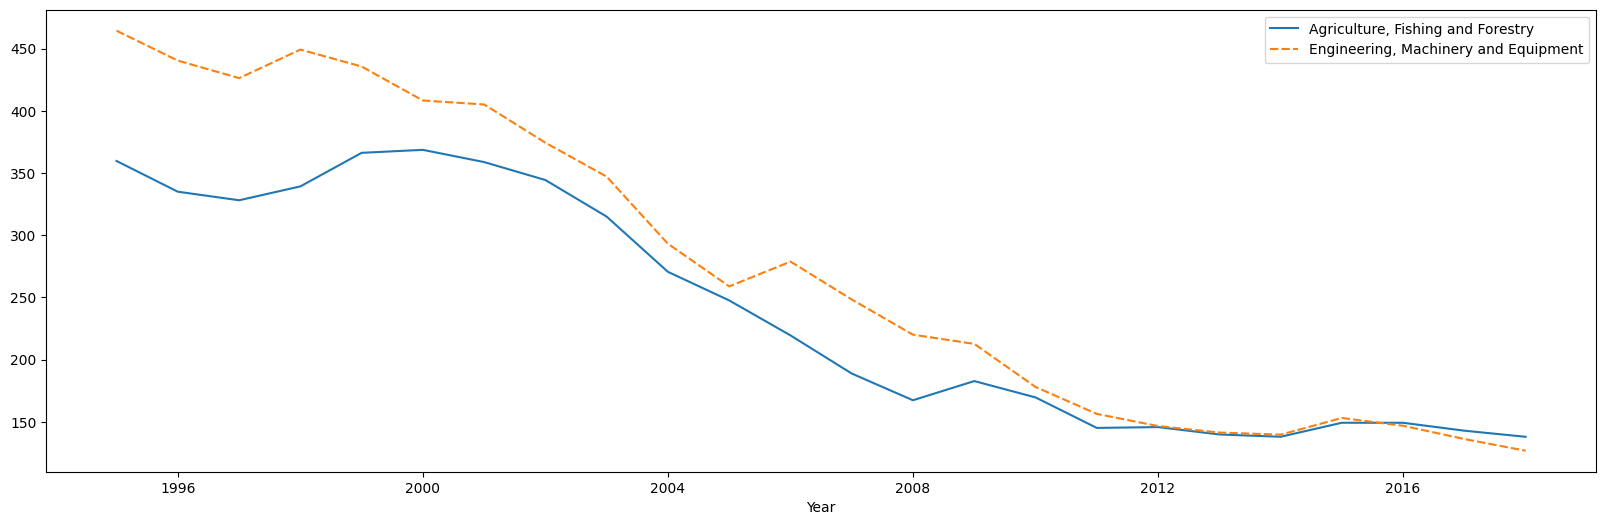

In [64]:
#  Plotting
plt.figure(figsize=(20,6))

sns.lineplot(data=df_itry_gdp_merged[['Agriculture, Fishing and Forestry','Engineering, Machinery and Equipment']])
plt.show()

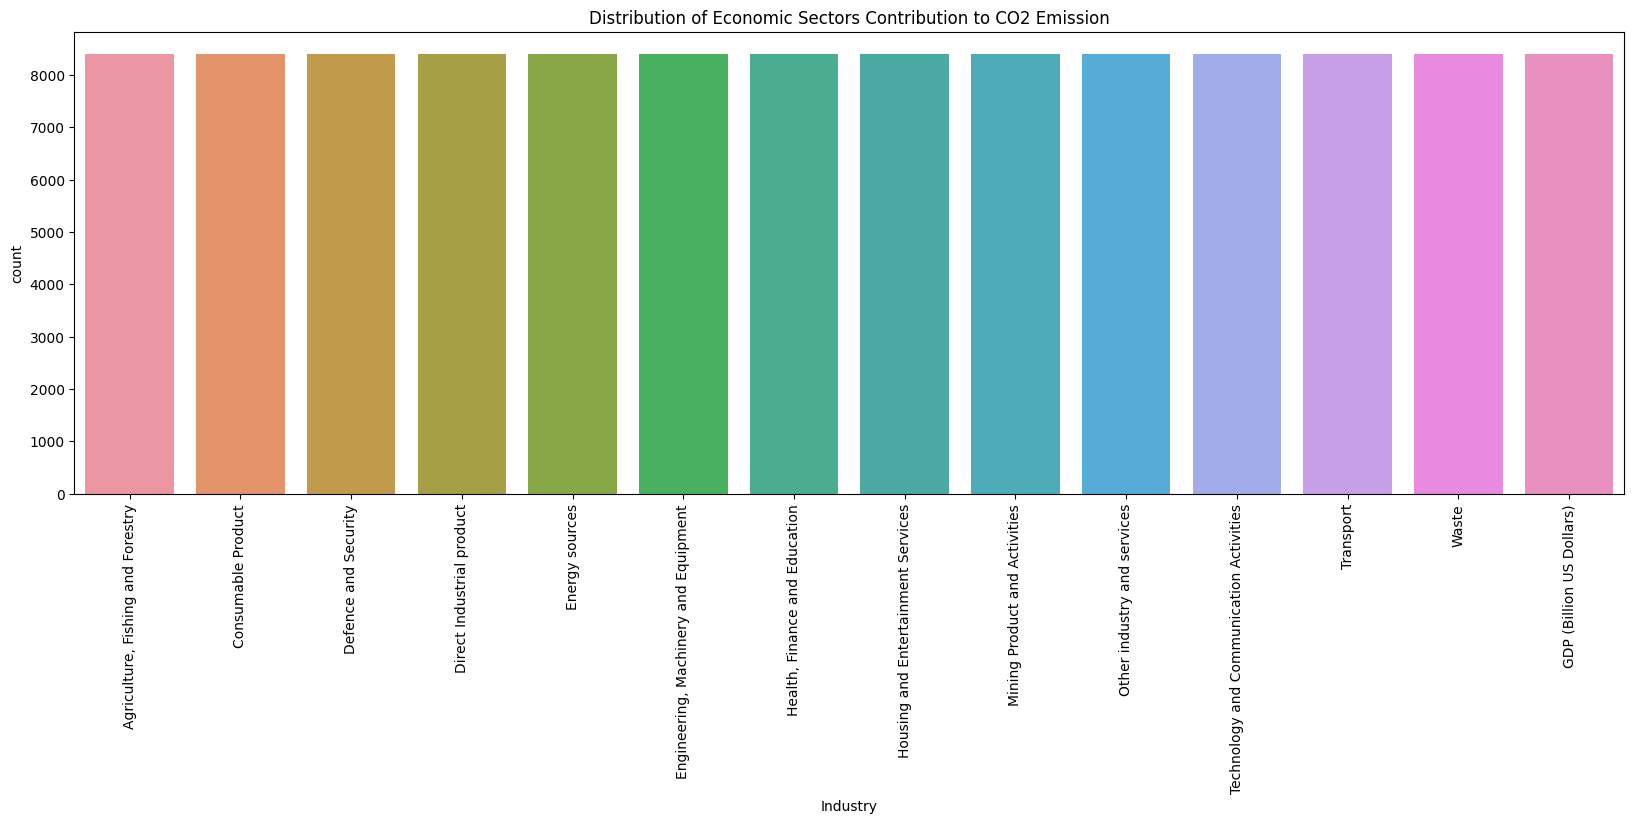

In [64]:
# Need rework (the quantity of data for each)
plt.figure(figsize=(20,6))
xis = sns.countplot(data=df_itry_gdp_daily)
plt.xticks(x=df_itry_gdp_daily.index, rotation='vertical') 
# plt.legend(
#     df_mod_ind.new_industry, 
#     title='Economic Sectors', 
#     title_fontsize=15, 
#     prop={'size':12}
#     )
plt.xlabel("Industry")
plt.title("Distribution of Economic Sectors Contribution to CO2 Emission")
plt.show()

In [65]:
# The CO2 emission time series dataset is ploted to visualize the dependency of the emission in the power generation with time.
# fig, ax = plt.subplots()
# for desc, group in Energy_sources:
#     group.plot(x = "Industry", y='Value', label=desc,ax = ax, title='Carbon Emissions per Energy Source', fontsize = 20)
#     ax.set_xlabel('Time(Monthly)')
#     ax.set_ylabel('Carbon Emissions in MMT')
#     ax.xaxis.label.set_size(20)
#     ax.yaxis.label.set_size(20)
#     ax.legend(fontsize = 16)

### Preprocessing Contd

<Axes: title={'center': 'Correlation of Features'}>

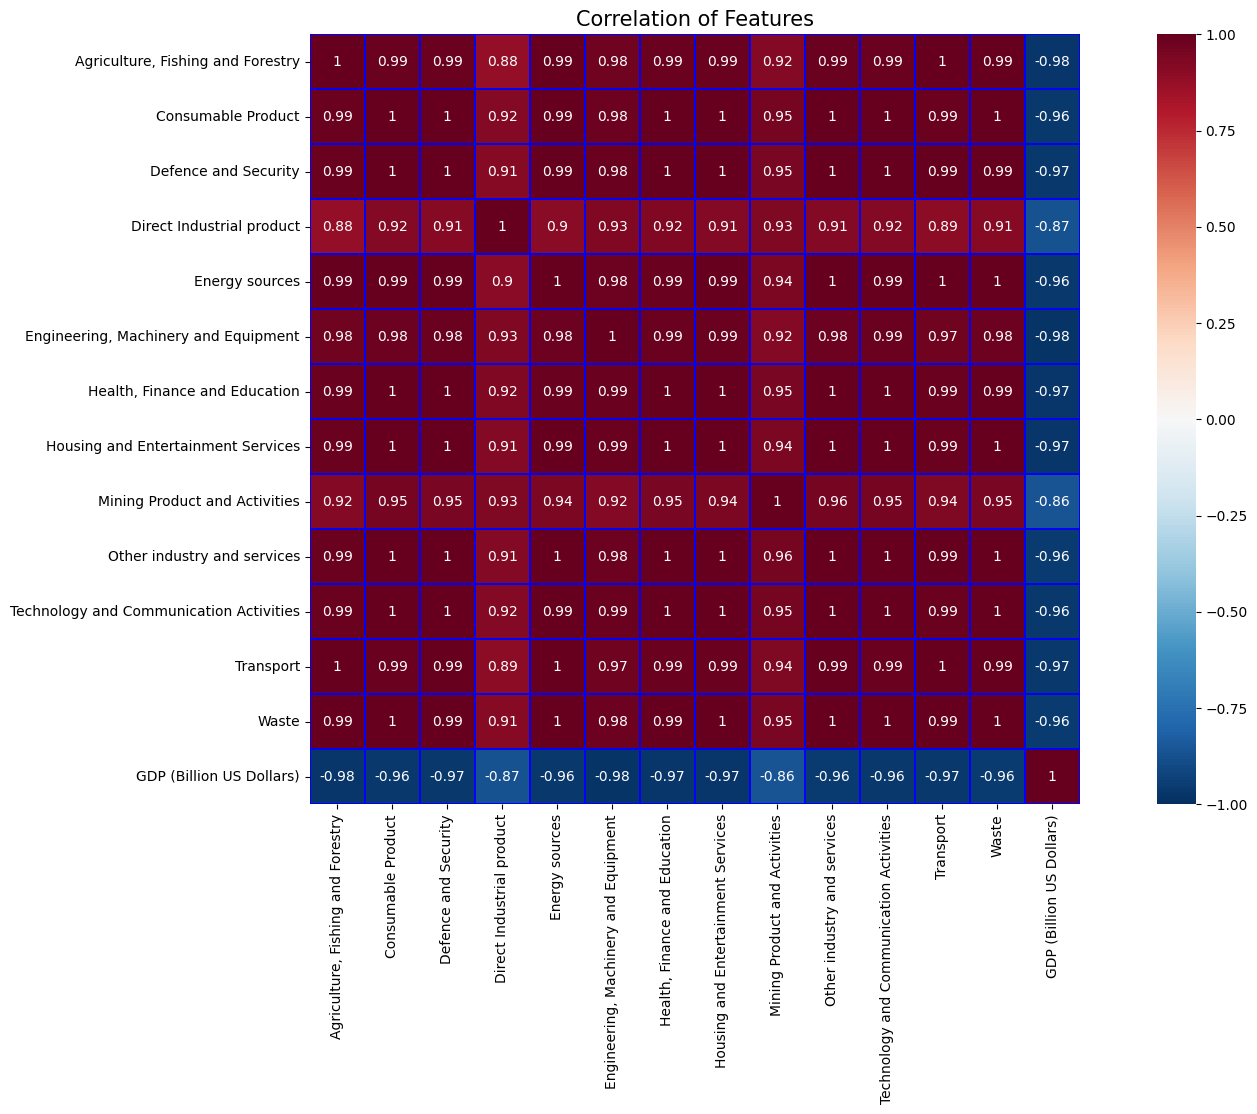

In [66]:
corr = df_itry_gdp_daily.corr()
# corr.style.background_gradient(cmap='YlOrRd')
#Exploratory data analysis

colormap = plt.cm.RdBu_r
plt.figure(figsize=(20,10))
plt.title('Correlation of Features', y=1, size=15)
sns.heatmap(corr, linewidths=0.15,vmin=-1.0, vmax=1.0, 
            square=True, cmap=colormap, linecolor='blue', annot=True)

In [67]:
df_itry_gdp_preprocessed = df_itry_gdp_daily.copy()
df_ctry_gdp_preprocessed = df_ctry_gdp_daily.copy()
df_itry_co2_preprocessed = df_itry_co2_daily.copy()
df_ctry_co2_preprocessed = df_ctry_co2_daily.copy()

In [68]:
# Export the preprocessed file to CSV
# H:/My Drive/Python SQL and Tableau/python_code
df_itry_gdp_preprocessed.to_csv('../dataset/global_CO2_emissions/world_gdp_with_focus_on_industries_preprocessed.csv', index=True)
df_ctry_gdp_preprocessed.to_csv('../dataset/global_CO2_emissions/world_gdp_with_focus_on_countries_preprocessed.csv', index=True)
df_itry_co2_preprocessed.to_csv('../dataset/global_CO2_emissions/global_CO2_emmissions_with_focus_on_industries_preprocessed.csv', index=True)
df_ctry_co2_preprocessed.to_csv('../dataset/global_CO2_emissions/global_CO2_emmissions_with_focus_on_countries_preprocessed.csv', index=True)

